4. Write a python program to perform ridge regression on the given dataset using repeated k-fold cross validation and report the average mean absolute
error 
5. Write a python program to build logistic regression model for the given dataset and evaluate its performace using confusion matrix. Also visualize confusion matrix using heat map
6. Write a python program to generate synthetic data and fit Lasso regression model to it. Experiment with differnt values of alpha to find the one that gives the best performace on your data.

Alpha: 0.001, MSE: 104.2044718838567
Alpha: 0.01, MSE: 104.22478966107091
Alpha: 0.1, MSE: 104.43881875744724
Alpha: 1.0, MSE: 107.66424214462873
Alpha: 10.0, MSE: 248.43171835826507

Best Alpha: 0.001, Best MSE: 104.2044718838567


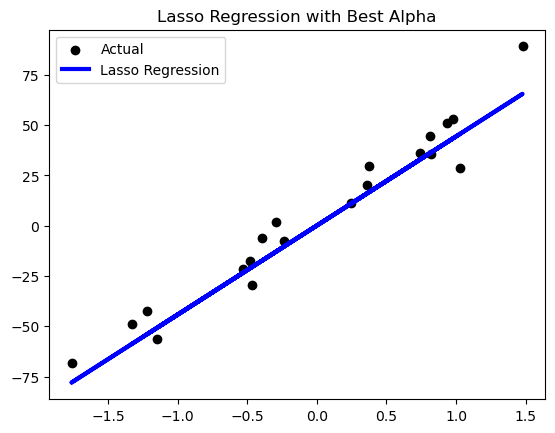

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Generate synthetic data
X, y = make_regression(n_samples=100, n_features=1, noise=10, random_state=42)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Function to fit Lasso regression model and evaluate performance
def fit_lasso_regression(alpha):
    model = Lasso(alpha=alpha, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    return model, mse

# Experiment with different values of alpha
alpha_values = [0.001, 0.01, 0.1, 1.0, 10.0]

best_alpha = None
best_mse = float('inf')
best_model = None

for alpha in alpha_values:
    model, mse = fit_lasso_regression(alpha)
    print(f'Alpha: {alpha}, MSE: {mse}')

    if mse < best_mse:
        best_mse = mse
        best_alpha = alpha
        best_model = model

print(f'\nBest Alpha: {best_alpha}, Best MSE: {best_mse}')

# Plot the results
plt.scatter(X_test, y_test, color='black', label='Actual')
plt.plot(X_test, best_model.predict(X_test), color='blue', linewidth=3, label='Lasso Regression')
plt.title('Lasso Regression with Best Alpha')
plt.legend()
plt.show()
